# 固有値法による背景抽出概要

## 5枚の画像についてPCAかけて固有値を得る

In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

PATH_TO_DATA_DIR = os.path.join("/root", "data", "CDnet2014_DataSet_Subset", "baseline", "highway", "input")
files = os.listdir(PATH_TO_DATA_DIR)
filename = files[0]
img = cv2.imread(os.path.join(PATH_TO_DATA_DIR, filename), 0)
height, width = img.shape[0], img.shape[1]
n_samples = 5

for i in range(n_samples):
    filename = files[i]
    img = cv2.imread(os.path.join(PATH_TO_DATA_DIR, filename), 0)
    img = img.reshape(1,height*width)
    
    if i == 0:
        imgs = img
    else:
        imgs = np.concatenate((imgs, img), axis=0)
        
        
#PCAして固有値を得る        
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(imgs)

x_avg = pca.mean_.reshape(height*width, 1)
U = pca.components_[:1].T

## 新しい観測画像

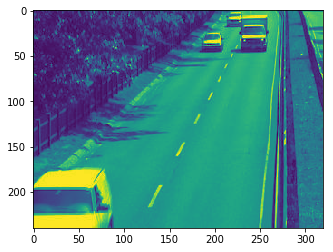

In [6]:
filename_t = files[n_samples+5]
x_t = cv2.imread(os.path.join(PATH_TO_DATA_DIR, filename_t), 0)
x_t = x_t.reshape(height*width, 1)

plt.imshow(cv2.imread(os.path.join(PATH_TO_DATA_DIR, filename_t), 0))

## 観測画像を背景固有空間に逆写像してやると背景のみ抽出される

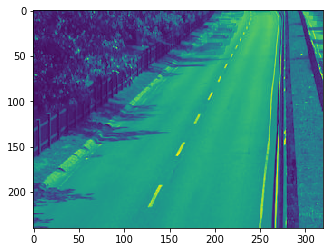

In [3]:
temp = U.T.dot((x_t - x_avg))
img_2 = U.dot(temp) + x_avg

plt.imshow(img_2.reshape(height, width))

## おまけ：5枚の平均画像

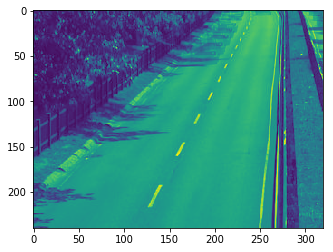

In [4]:
x_avg = pca.mean_.reshape(height,width)
plt.imshow(x_avg)